In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# HW4

## Q1

In [2]:
np.random.seed(365)
n = 10
mu, sigma = 0, 1
x = stats.norm(loc=mu, scale=sigma).rvs(size=n)
C, G = 2, 10000
theta, tau = np.zeros([C, G]), np.ones([C, G])

for c in range(C):
    for g in range(1, G):
        tau_tar = lambda tau_: np.prod(stats.norm(loc=theta[c, g-1], scale=1/tau_**0.5).pdf(x)) *\
                               stats.gamma(a=1, scale=2).pdf(tau[c, g-1])
        tau_prop = stats.expon(scale=1)
        tau_til = tau_prop.rvs()
        tau_mh = tau_tar(tau_til) * tau_prop.pdf(tau[c, g-1]) /\
                 (tau_tar(tau[c, g-1]) * tau_prop.pdf(tau_til))
        tau_ap = min(1, tau_mh)
        if stats.uniform().rvs() < tau_ap:
            tau[c, g] = tau_til
        else:
            tau[c, g] = tau[c, g-1]

        theta_tar = lambda theta_: np.prod(stats.norm(loc=theta_, scale=1/tau[c, g]**0.5).pdf(x)) *\
                                   stats.norm(loc=0, scale=1).pdf(theta[c, g-1])
        theta_til = stats.norm(loc=0, scale=1).rvs()
        theta_mh = theta_tar(theta_til) / theta_tar(theta[c, g-1])
        theta_ap = min(1, theta_mh)
        if stats.uniform().rvs() < theta_ap:
            theta[c, g] = theta_til
        else:
            theta[c, g] = theta[c, g-1]

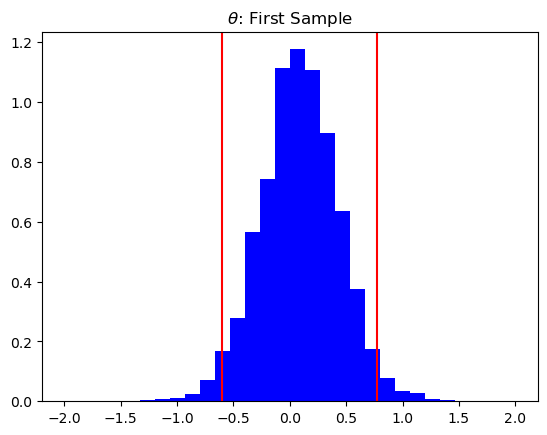

95% Credible Interval:  [-0.60097958  0.77128562]


In [3]:
plt.hist(theta[0, :], bins=30, range=(-2, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[0, :], 0.025), color="red")
plt.axvline(np.quantile(theta[0, :], 0.975), color="red")
plt.title(r"$\theta$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[0, :], [0.025, 0.975]))

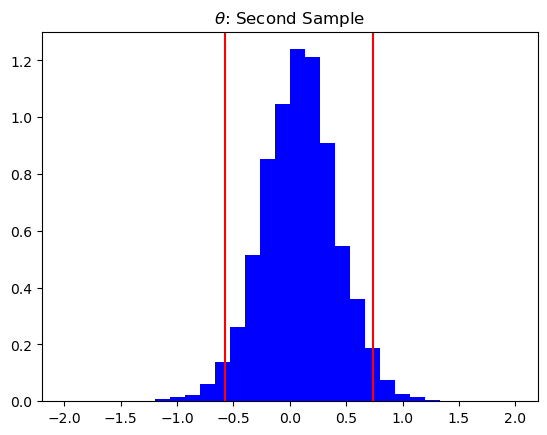

95% Credible Interval:  [-0.57517785  0.73578252]


In [4]:
plt.hist(theta[1, :], bins=30, range=(-2, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[1, :], 0.025), color="red")
plt.axvline(np.quantile(theta[1, :], 0.975), color="red")
plt.title(r"$\theta$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[1, :], [0.025, 0.975]))

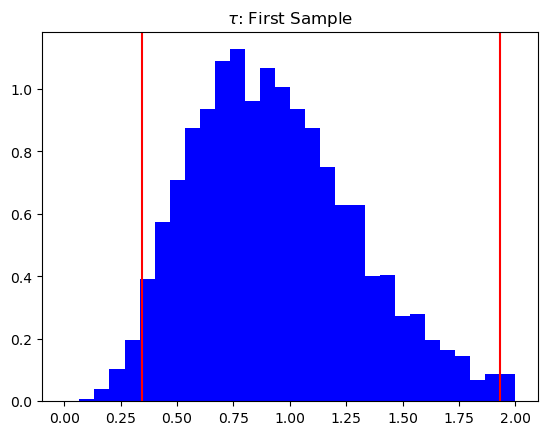

95% Credible Interval:  [0.34552236 1.93078416]


In [5]:
plt.hist(tau[0, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(tau[0, :], 0.025), color="red")
plt.axvline(np.quantile(tau[0, :], 0.975), color="red")
plt.title(r"$\tau$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[0, :], [0.025, 0.975]))

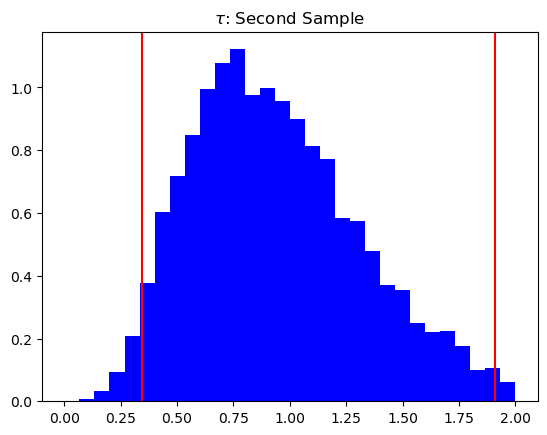

95% Credible Interval:  [0.3439199  1.91083381]


In [6]:
plt.hist(tau[1, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(tau[1, :], 0.025), color="red")
plt.axvline(np.quantile(tau[1, :], 0.975), color="red")
plt.title(r"$\tau$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[1, :], [0.025, 0.975]))

## Q2

In [7]:
np.random.seed(365)
n = 10
mu, sigma = 0, 1
x = stats.norm(loc=mu, scale=sigma).rvs(size=n)
C, G = 2, 10000
theta, tau = np.zeros([C, G]), np.ones([C, G])

for c in range(C):
    for g in range(1, G):
        tau_tar = lambda tau_: np.prod(stats.norm(loc=theta[c, g-1], scale=1/tau_**0.5).pdf(x)) *\
                               stats.expon(scale=1).pdf(tau[c, g-1])
        tau_prop = stats.truncnorm(a=-tau[c, g-1], b=np.inf, loc=tau[c, g-1], scale=1)
        tau_til = tau_prop.rvs()
        tau_mh = tau_tar(tau_til) * tau_prop.pdf(tau[c, g-1]) /\
                 (tau_tar(tau[c, g-1]) * tau_prop.pdf(tau_til))
        tau_ap = min(1, tau_mh)
        if stats.uniform().rvs() < tau_ap:
            tau[c, g] = tau_til
        else:
            tau[c, g] = tau[c, g-1]

        theta_tar = lambda theta_: np.prod(stats.norm(loc=theta_, scale=1/tau[c, g]**0.5).pdf(x)) *\
                                   stats.cauchy(loc=0, scale=5).pdf(theta[c, g-1])
        theta_til = stats.norm(loc=0, scale=1).rvs()
        theta_mh = theta_tar(theta_til) / theta_tar(theta[c, g-1])
        theta_ap = min(1, theta_mh)
        if stats.uniform().rvs() < theta_ap:
            theta[c, g] = theta_til
        else:
            theta[c, g] = theta[c, g-1]

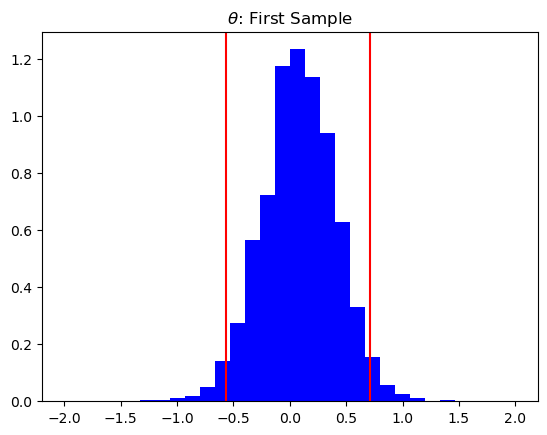

95% Credible Interval:  [-0.56722371  0.71214913]


In [8]:
plt.hist(theta[0, :], bins=30, range=(-2, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[0, :], 0.025), color="red")
plt.axvline(np.quantile(theta[0, :], 0.975), color="red")
plt.title(r"$\theta$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[0, :], [0.025, 0.975]))

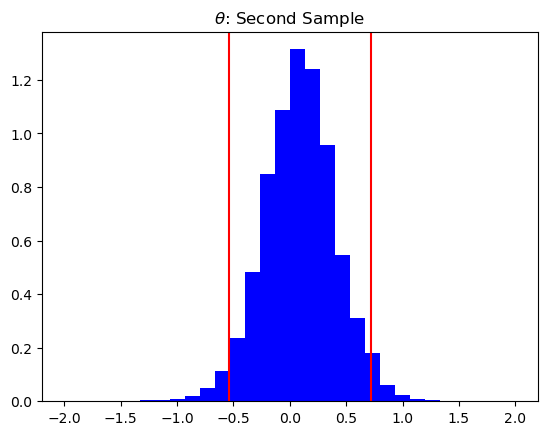

95% Credible Interval:  [-0.54047848  0.71998841]


In [9]:
plt.hist(theta[1, :], bins=30, range=(-2, 2), density=True, color="blue")
plt.axvline(np.quantile(theta[1, :], 0.025), color="red")
plt.axvline(np.quantile(theta[1, :], 0.975), color="red")
plt.title(r"$\theta$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(theta[1, :], [0.025, 0.975]))

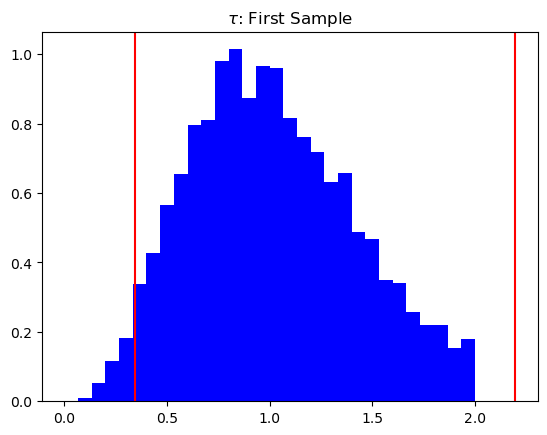

95% Credible Interval:  [0.34562153 2.1969678 ]


In [10]:
plt.hist(tau[0, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(tau[0, :], 0.025), color="red")
plt.axvline(np.quantile(tau[0, :], 0.975), color="red")
plt.title(r"$\tau$: First Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[0, :], [0.025, 0.975]))

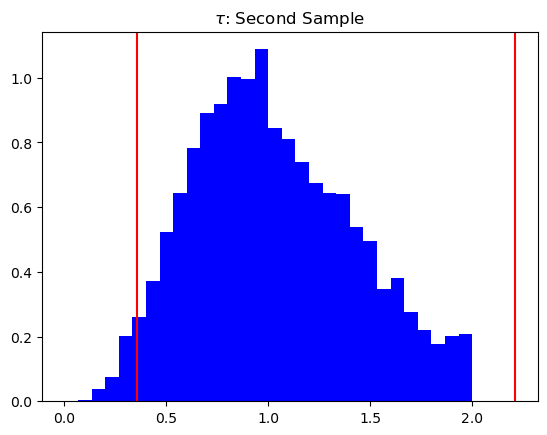

95% Credible Interval:  [0.35767623 2.21180483]


In [11]:
plt.hist(tau[1, :], bins=30, range=(0, 2), density=True, color="blue")
plt.axvline(np.quantile(tau[1, :], 0.025), color="red")
plt.axvline(np.quantile(tau[1, :], 0.975), color="red")
plt.title(r"$\tau$: Second Sample")
plt.show()
print("95% Credible Interval: ", np.quantile(tau[1, :], [0.025, 0.975]))

When we conduct Gibbs sampling, we need to know the analytical form of the full conditional distributions in order to sample from them. However, when full conditional distributions are not recognizable (without an invertible cdf), we need to use Metropolis Hastings algorithm to sample from the joint, which is proportional to the full conditional distributions. This algorithm allows us to choose prior freely. 

## Q3

$\begin{align*}
p(0)&=\left(\frac{1}{3}\right)^1\left(\frac{2}{3}\right)^0=\frac{1}{3}\\
p(1)&=\left(\frac{1}{3}\right)^0\left(\frac{2}{3}\right)^1=\frac{2}{3}\\
q(0|0)&=q(0|1)=\left(\frac{1}{2}\right)^1\left(\frac{1}{2}\right)^0=\frac{1}{2}\\
q(1|0)&=q(1|1)=\left(\frac{1}{2}\right)^0\left(\frac{1}{2}\right)^1=\frac{1}{2}\\
\end{align*}$

Since $q(0|0)=q(0|1)=q(1|0)=q(1|1)$, they will cancel out.

$\begin{align*}
P(x^{(t)}=0\rightarrow x^{(t+1)}=0)&=q(0|0)+q(1|0)\cdot\left(1-\min\left(1,\frac{p(1)}{p(0)}\right)\right)=0.5\\
P(x^{(t)}=0\rightarrow x^{(t+1)}=1)&=q(1|0)\cdot\min\left(1,\frac{p(1)}{p(0)}\right)=0.5\\
P(x^{(t)}=1\rightarrow x^{(t+1)}=0)&=q(0|1)\cdot\min\left(1,\frac{p(0)}{p(1)}\right)=0.25\\
P(x^{(t)}=1\rightarrow x^{(t+1)}=1)&=q(1|1)+q(0|1)\cdot\left(1-\min\left(1,\frac{p(0)}{p(1)}\right)\right)=0.75\\
\end{align*}$

So, 
$K=\begin{bmatrix}P(x^{(t)}=0\rightarrow x^{(t+1)}=0)&P(x^{(t)}=1\rightarrow x^{(t+1)}=0)\\P(x^{(t)}=0\rightarrow x^{(t+1)}=1)&P(x^{(t)}=1\rightarrow x^{(t+1)}=1)\end{bmatrix}=\begin{bmatrix}0.5&0.25\\0.5&0.75\end{bmatrix}$